In [1]:
import tensorboard as tensorboard
import seaborn as seaborn
from tensorflow.python.client import device_lib
import tensorflow as tf
print('tensorflow' + tf.__version__)
print('tensorboard' + tensorboard.__version__)
print('seaborn' + seaborn.__version__)
tf.config.list_physical_devices('GPU')
tf.test.is_built_with_cuda
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.experimental.list_physical_devices('GPU')
device_lib.list_local_devices()

tensorflow2.1.0
tensorboard2.1.0
seaborn0.10.1
Num GPUs Available:  0


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9904632555964045186]

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

data_dir="..\\input\\pets"
test_path= os.path.join(data_dir, 'test')
train_path= os.path.join(data_dir, 'train')
os.listdir(train_path)

['cats', 'dogs']

In [3]:

cat_image = train_path + '\\cats\\' + os.listdir(train_path + '\cats')[0]
imread(cat_image).shape
# plt.imshow(imread(cat_image))

(240, 201, 3)

'..\\input\\pets\\train\\dogs\\110345287_93f7070cb1.jpg'

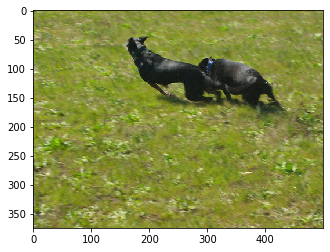

In [4]:
dog_image = train_path + '\\dogs\\' + os.listdir(train_path + '\\dogs\\')[5]
plt.imshow(imread(dog_image))
dog_image

In [5]:
len(os.listdir(train_path + '\\dogs'))

551

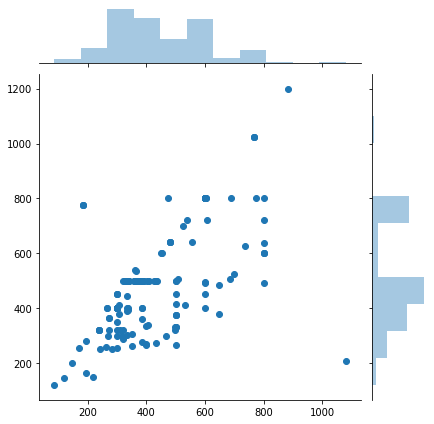

In [6]:
dim1=[]
dim2=[]

for image_filename in os.listdir(test_path + '\\dogs\\'):
    img = imread(test_path+'\\dogs\\' + image_filename)
#     print (train_path+'\\dogs\\' + image_filename)
    d1,d2, _ = img.shape
    dim1.append(d1)
    dim2.append(d2)
sns.jointplot(dim1, dim2)

In [7]:
np.mean(dim2)
imread(dog_image).shape
image_shape =(300, 300, 3)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, rescale =1/255, 
                               shear_range=0.1, zoom_range=0.1, horizontal_flip=True, fill_mode='nearest')

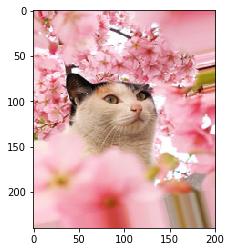

In [9]:
# plt.imshow(imread(cat_image))
cat_image
plt.imshow(image_gen.random_transform(imread(cat_image)))

In [10]:
image_gen.flow_from_directory(train_path)

Found 1338 images belonging to 2 classes.


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)
batch_size=16

train_image_gen= image_gen.flow_from_directory(train_path, target_size=image_shape[:2], 
                                               color_mode='rgb', batch_size=batch_size, 
                                               class_mode='binary')

test_image_gen= image_gen.flow_from_directory(test_path, target_size=image_shape[:2], 
                                               color_mode='rgb', batch_size=batch_size, 
                                               class_mode='binary', shuffle=False)

train_image_gen.class_indices

Found 1338 images belonging to 2 classes.
Found 397 images belonging to 2 classes.


{'cats': 0, 'dogs': 1}

In [18]:
results = model.fit(train_image_gen, epochs=20, validation_data=test_image_gen, callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 84 steps, validate for 25 steps
Epoch 1/20
84/84 [==============================] - 317s 4s/step - loss: 0.7576 - accuracy: 0.5583 - val_loss: 0.6929 - val_accuracy: 0.5013
Epoch 2/20
84/84 [==============================] - 258s 3s/step - loss: 0.6644 - accuracy: 0.5882 - val_loss: 0.6953 - val_accuracy: 0.5013
Epoch 3/20
84/84 [==============================] - 248s 3s/step - loss: 0.6588 - accuracy: 0.5852 - val_loss: 0.7005 - val_accuracy: 0.5013
